In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# ```Convolutional Layer:``` Layer of scanning neuron with filters

In [23]:
# Define a convolutional layer
conv = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1) # This layer has 6 scanning neurons

# Example input: a batch of 1 image with 3 channels (e.g., RGB), 32x32 pixels
input = torch.randn(1, 3, 32, 32)

# Apply the convolution
output = conv(input)
print(output.shape)  # Output feature map after this layer have 6 channels as we have 6 neurons

torch.Size([1, 6, 32, 32])


In [24]:
# Define a convolutional layer
conv = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1) # 64 neurons, each processes 128 channeled feature map with 128 * 3 * 3 filter

# Example input: a batch of 1 image with 128 channels, 32x32 pixels
input = torch.randn(1, 128, 32, 32)

# Apply the convolution
output = conv(input)
print(output.shape) # Each neuron produces one feature map thus a total 64 feature maps

torch.Size([1, 64, 32, 32])


In [26]:
print(conv.weight.shape) # Total weights in this layer: In terms of filters each neuron is having a filter of size 128 * 3 * 3 (i.e. 128 filters of size 3 * 3 stacked), and a total such 64 filters for 64 neurons. Thus a total of 73,728 weight

torch.Size([64, 128, 3, 3])


In [28]:
print(conv.bias.shape) # Each neuron will have one bias (as we take linear combination of 128*3*3 features and add a bias term before activation), thus a total of 64 bias. Hence we have 73,728 + 64 parameters in this single layer.

torch.Size([64])


In [29]:
# Define a max pooling layer
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

# Example input: a batch of 1 image with 3 channels, 32x32 pixels
input = torch.randn(1, 3, 32, 32)

# Apply the max pooling
output = max_pool(input)
print(output.shape)  

torch.Size([1, 3, 16, 16])


In [30]:
# Define an average pooling layer
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

# Apply the average pooling
output = avg_pool(input)
print(output.shape)  

torch.Size([1, 3, 16, 16])


In [32]:
# A simple CNN with two convolutional layers (first with 6 neurons and second with 16 neurons), we will have an input with 3 channels and a pooling layer after each convolutional layer
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)
    
    def forward(self, x): # X: (1, 3, 32, 32)
        x = self.conv1(x) # First convolution layer, x: (1, 6, 32, 32)
        x = torch.relu(x) # ReLU activation
        x = self.pool(x)  # First max polling layer, x: (1, 6, 16, 16)
        x = self.conv2(x) # Second convolutional layer, x: (1, 16, 16, 16)
        x = torch.relu(x) # ReLU activation
        x = self.pool(x)  # Second convolutional layer, x: (1, 16, 8, 8)
        return x

# Create the network
net = SimpleCNN()

# Example input: a batch of 1 image with 3 channels, 32x32 pixels
input = torch.randn(1, 3, 32, 32)

# Forward pass
output = net(input)
print(output.shape) # Thus we converted an image of size 32x32 with three channels to an image of size 8x8 with 16 channels, but this output is high dimensional representation of same input image

torch.Size([1, 16, 8, 8])


In [33]:
# Once we are done with feature enrichment and extraction, we will have to use dense (fc) layers to perform final classification or regression task
class ConvToDense(nn.Module):
    def __init__(self):
        super(ConvToDense, self).__init__()
        self.conv = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(64 * 32 * 32, 10)  # 10 neuron if we want to do 10 class classification
    
    def forward(self, x): # x: (1, 128, 32, 32)
        x = self.conv(x) # First convolutional layer, x: (1, 64, 32, 32)
        x = torch.relu(x)  # Apply ReLU activation
        x = x.view(x.size(0), -1)  # Flatten the tensor, x: (1, 64 * 32 * 32)
        x = self.fc(x)
        return x

# Example input: a batch of 1 image with 128 channels, 32x32 pixels
input = torch.randn(1, 128, 32, 32)

# Create the model and apply it to the input
model = ConvToDense()
output = model(input)
print(output.shape)  # Output shape: (1, 10)

torch.Size([1, 10])


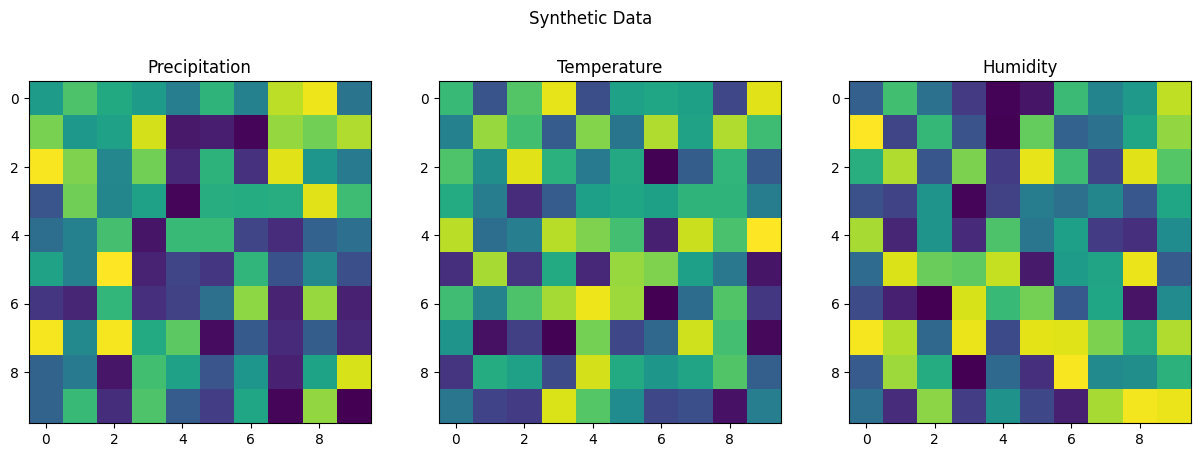

In [35]:
# Create synthetic data
np.random.seed(0)  # For reproducibility
precipitation = np.random.rand(10, 10)
temperature = np.random.rand(10, 10)
humidity = np.random.rand(10, 10)

# Combine into a single tensor
data = np.stack([precipitation, temperature, humidity], axis=0)  # Shape: (3, 10, 10)
data_tensor = torch.tensor(data, dtype=torch.float32)

# Function to visualize a 3D tensor
def visualize_3d_tensor(tensor, title=None):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    channel_names = ['Precipitation', 'Temperature', 'Humidity']
    for i in range(3):
        axes[i].imshow(tensor[i], cmap='viridis')
        axes[i].set_title(channel_names[i])
    if title is not None:
        fig.suptitle(title)
    plt.show()

# Visualize the synthetic data
visualize_3d_tensor(data_tensor, title="Synthetic Data")


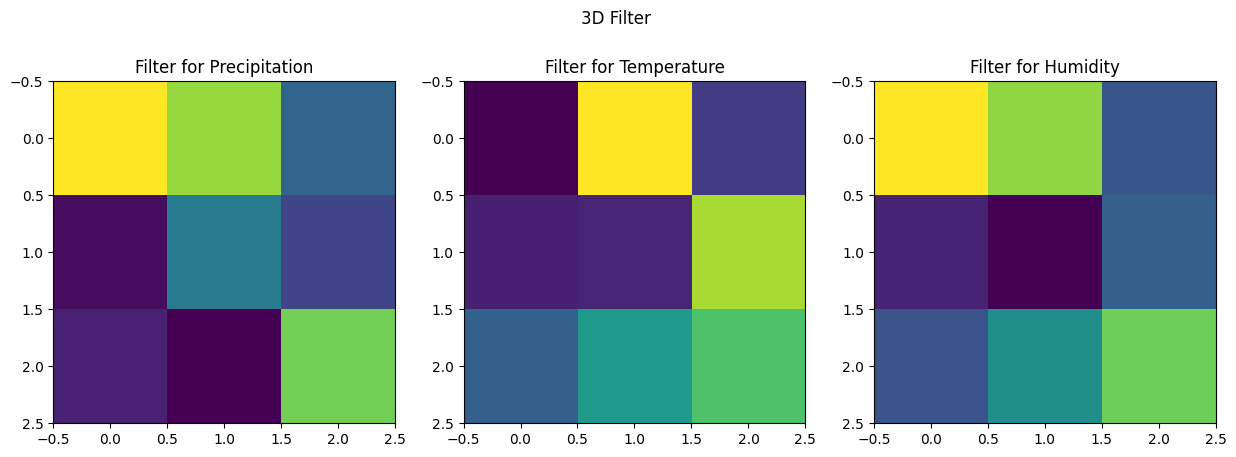

In [36]:
# Create a 3x3 filter for each channel
filter_weights = np.random.rand(3, 3, 3)  # Shape: (3, 3, 3)
filter_tensor = torch.tensor(filter_weights, dtype=torch.float32)

# Function to visualize a 3D filter
def visualize_3d_filter(tensor, title=None):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    channel_names = ['Filter for Precipitation', 'Filter for Temperature', 'Filter for Humidity']
    for i in range(3):
        axes[i].imshow(tensor[i], cmap='viridis')
        axes[i].set_title(channel_names[i])
    if title is not None:
        fig.suptitle(title)
    plt.show()

# Visualize the filter
visualize_3d_filter(filter_tensor, title="3D Filter")

In [37]:
# Define a convolutional layer with the custom filter
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1, bias=False)
conv.weight = nn.Parameter(filter_tensor.unsqueeze(0))  # Set the filter weights, the weights of PyTorch are mutable

# Apply convolution
data_tensor = data_tensor.unsqueeze(0)  # Add batch dimension, learn about squeeze and unsqueeze in detail
conv_output = conv(data_tensor)
print(conv_output.shape)  # Output shape will be (1, 1, 10, 10)

# Remove batch and channel dimensions for visualization
conv_output = conv_output.squeeze(0).squeeze(0)

torch.Size([1, 1, 10, 10])


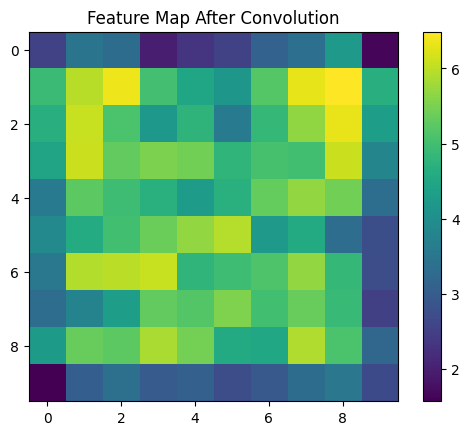

In [38]:
# Visualize the feature map
plt.imshow(conv_output.detach().numpy(), cmap='viridis')
plt.title("Feature Map After Convolution")
plt.colorbar()
plt.show()

In [39]:
# Upsample the merged feature map by a factor of 1.25 using a fully connected layer, this is a regression task
height, width = conv_output.shape
new_height = int(height * 1.25)
new_width = int(width * 1.25)

# Flatten the convolution output
flattened_output = conv_output.view(-1)

# Define a fully connected layer to upsample the flattened output
fc = nn.Linear(flattened_output.size(0), new_height * new_width) # Here we are using brute force to increase the number of pixels to upsample

# Apply the fully connected layer
upsampled_flattened_output = fc(flattened_output)

# Reshape the upsampled flattened output to the new dimensions
upsampled_output = upsampled_flattened_output.view(new_height, new_width)

print("Upsampled output shape:", upsampled_output.shape)

Upsampled output shape: torch.Size([12, 12])


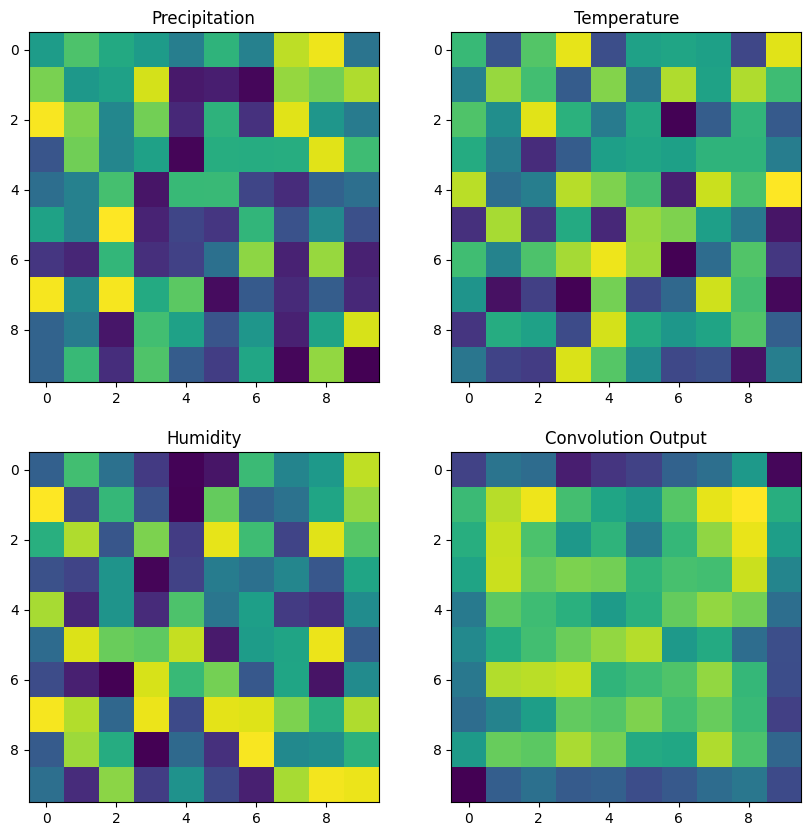

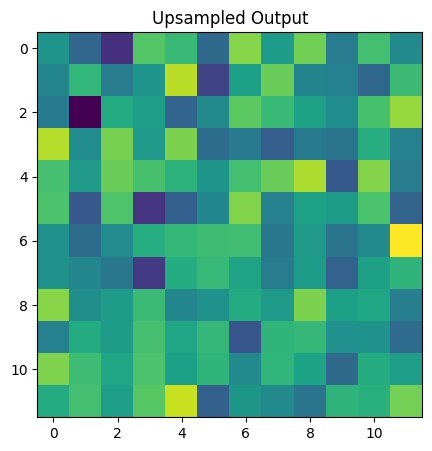

In [40]:
# Plotting the input channels, convolution output, and upsampled output
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Input channels
axs[0, 0].imshow(precipitation, cmap='viridis')
axs[0, 0].set_title('Precipitation')
axs[0, 1].imshow(temperature, cmap='viridis')
axs[0, 1].set_title('Temperature')
axs[1, 0].imshow(humidity, cmap='viridis')
axs[1, 0].set_title('Humidity')

# Convolution output
axs[1, 1].imshow(conv_output.detach().numpy(), cmap='viridis')
axs[1, 1].set_title('Convolution Output')

# Create a new figure for the upsampled output
fig2, ax2 = plt.subplots(figsize=(5, 5))
ax2.imshow(upsampled_output.detach().numpy(), cmap='viridis')
ax2.set_title('Upsampled Output')

plt.show()

In [43]:
# Let's also visualize stepwise output
# Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)        # Max pooling layer
        self.fc1 = nn.Linear(32 * 14 * 14, 128)                  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)                            # Output layer
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))                               # Convolution + ReLU
        conv1_output = x.detach().numpy().squeeze()             # Store output after conv1 + ReLU
        x = self.pool(x)                                        # Max pooling
        pool_output = x.detach().numpy().squeeze()              # Store output after pooling
        x = x.view(-1, 32 * 14 * 14)                            # Flatten the tensor
        x = torch.relu(self.fc1(x))                                 # Fully connected layer + ReLU
        x = self.fc2(x)                                         # Output layer (no activation function for demonstration)
        return x, conv1_output, pool_output

In [44]:
# Instantiate the model
model = SimpleCNN()

# Generate a dummy input image (1x28x28)
input_image = np.random.rand(1, 1, 28, 28).astype(np.float32)
input_tensor = torch.tensor(input_image)

# Pass the input image through the model
output, conv1_output, pool_output = model(input_tensor)

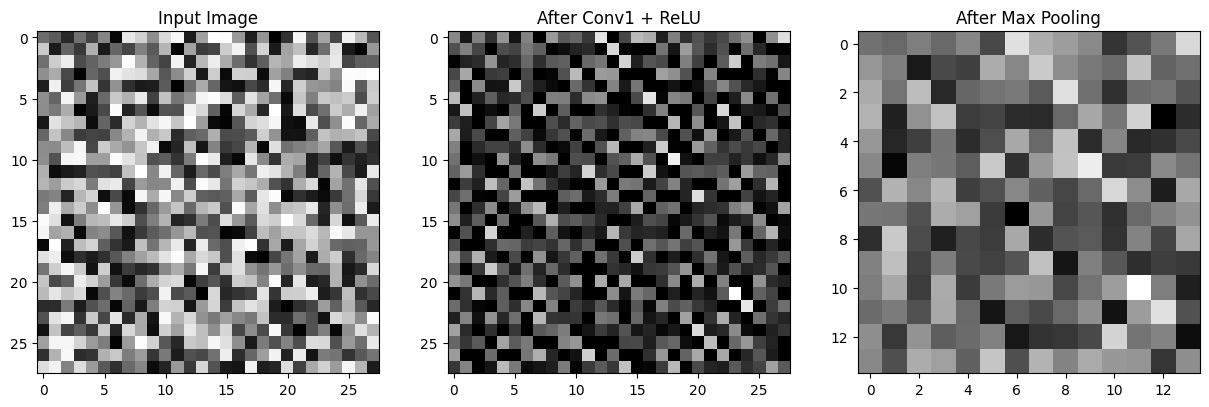

In [45]:
# Plot the intermediate results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(input_image.squeeze(), cmap='gray')
axes[0].set_title('Input Image')
axes[1].imshow(conv1_output[0], cmap='gray')
axes[1].set_title('After Conv1 + ReLU')
axes[2].imshow(pool_output[0], cmap='gray')
axes[2].set_title('After Max Pooling')
plt.show()

In [46]:
# Donot try to understand this image, these are random numbers

In [47]:
# Let us try one real example using CIFAR10 dataset in a new coding notebook